In [1]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
carpeta="csf1r"
os.chdir('/content/drive/MyDrive/descomposición_residuos/'+carpeta)

# Obtener la ruta de la carpeta actual
ruta_actual = os.getcwd()

# Reemplazar parte de la ruta con la nueva carpeta
carpeta_nueva = "nueva_carpeta"
ruta_nueva = ruta_actual.replace("carpeta_actual", carpeta_nueva)

# Cambiar el directorio actual a la nueva ruta
os.chdir(ruta_nueva)

In [3]:
protein=ruta_actual.split("/")[-1]
protein

'csf1r'

In [4]:
os.listdir()

['decomp_mmpbsa_analysis_mejorado_final.ipynb',
 '9MT-FINAL_DECOMP_MMPBSA.csv',
 'alpha-guaiene-FINAL_DECOMP_MMPBSA.csv',
 'Bergamal-FINAL_DECOMP_MMPBSA.csv',
 'Decomp_csf1r_merge.jpg',
 'Decomp_csf1r_merge.pdf',
 'decomp_mmpbsa_analysis_mejorado.ipynb',
 'Decomp_csf1r_merge_complete.pdf',
 'Decomp_csf1r_merge_best.pdf',
 'sinh-FINAL_DECOMP_MMPBSA.dat',
 'santolina-FINAL_DECOMP_MMPBSA.dat',
 'santolina-FINAL_DECOMP_MMPBSA.csv',
 'Decomp_csf1r_merge_complete2.pdf',
 'Decomp_csf1r_merge_best2.pdf',
 'Csf1r_inh-FINAL_DECOMP_MMPBSA.csv']

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def read_decomp(name):
    file_1 = pd.read_csv(name, header=5)
    file_1 = file_1.iloc[:, 1:]
    for i in range(1, 19):
        file_1.iloc[2:, i] = pd.to_numeric(file_1.iloc[2:, i], downcast='float', errors='coerce')
    file_1.set_index(file_1.iloc[:, 0], inplace=True)
    file_1.columns = file_1.iloc[0, :]
    return file_1

In [7]:
import os
import pandas as pd

# Obtener los nombres de archivo que terminan en .csv
file_names = [file for file in os.listdir() if file.endswith('.csv')]

# Leer los archivos y guardar los datos en un diccionario
file_data = {}
for i in range(len(file_names)):
  print(file_names[i])
  file_data[i] = read_decomp(file_names[i])


9MT-FINAL_DECOMP_MMPBSA.csv
alpha-guaiene-FINAL_DECOMP_MMPBSA.csv
Bergamal-FINAL_DECOMP_MMPBSA.csv
santolina-FINAL_DECOMP_MMPBSA.csv
Csf1r_inh-FINAL_DECOMP_MMPBSA.csv


In [8]:
index_value = file_data[0].index[-2]
number = int(index_value.split()[-1])
final_lenght=number+2
final_lenght

310

<Figure size 1500x800 with 0 Axes>

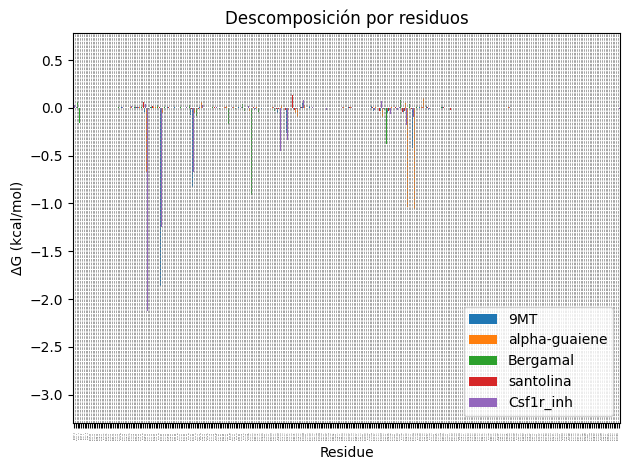

In [9]:
# Crear un nuevo DataFrame con los datos de cada archivo
merged_data = pd.DataFrame()
for i, file_name in enumerate(file_names):
    data = file_data[i].iloc[2:final_lenght, 16]
    label = file_name.replace("-FINAL_DECOMP_MMPBSA.csv", "")
    merged_data[label] = data.values

# Configuración del gráfico
plt.figure(figsize=(15, 8))  # Tamaño del gráfico
ax = merged_data.plot.bar(width=0.8)  # Graficar los datos como un gráfico de barras y ajustar el ancho de las barras

# Configuración de etiquetas y título
plt.ylabel('ΔG (kcal/mol)')
plt.xlabel('Residue')
plt.xticks(range(len(data.index)), data.index, rotation=90, fontsize=1) # Utilizar los valores del índice en el eje horizontal
plt.title("Descomposición por residuos")

# Agregar líneas verticales más delgadas para distinguir las barras
for i in range(len(data.index)):
    ax.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=0.5)  # Línea vertical delgada en la posición de cada valor horizontal

# Ajustar tamaño y posición de las leyendas
#legend = ax.legend(fontsize=20, loc='upper left', bbox_to_anchor=(0, 1))

# Ajustar espaciado entre etiquetas
plt.tight_layout()

# Guardar el gráfico como un archivo PDF
plt.savefig("Decomp_"+protein+"_merge_complete2.pdf", dpi=300)

# Mostrar el gráfico
plt.show()

<Figure size 1500x800 with 0 Axes>

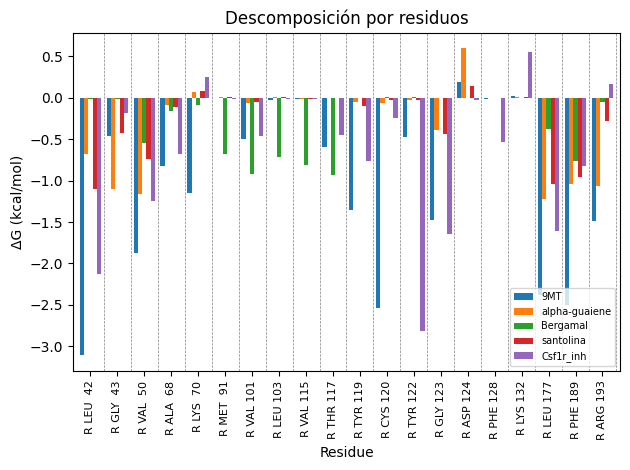

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los nombres de archivo que terminan en .csv
file_names = [file for file in os.listdir() if file.endswith('.csv')]

# Leer los archivos y guardar los datos en un diccionario
file_data = {}
for i, file_name in enumerate(file_names):
    file_data[i] = read_decomp(file_name)

# Crear un nuevo DataFrame con los datos de cada archivo
merged_data = pd.DataFrame()
for i, file_name in enumerate(file_names):
    data = file_data[i].iloc[2:final_lenght, 16]
    merged_data[file_name] = data.values

# Obtener el índice como etiquetas
index = file_data[0].iloc[2:final_lenght, 16].index

# Agregar el índice como columna en merged_data
merged_data.index = index

# Verificar si alguna fila cumple la condición
condition = ((merged_data > 0.5) | (merged_data < -0.5)).any(axis=1)
subset_data = merged_data[condition]

# Configuración del gráfico
plt.figure(figsize=(15, 8))  # Tamaño del gráfico
ax = subset_data.plot.bar(width=0.8)  # Graficar los datos del subset como un gráfico de barras y ajustar el ancho de las barras

# Configuración de etiquetas y título
plt.ylabel('ΔG (kcal/mol)')
plt.xlabel('Residue')
plt.xticks(range(len(subset_data.index)), subset_data.index, rotation=90, fontsize=8)  # Utilizar los valores del índice en el eje horizontal y ajustar el tamaño de fuente

# Modificar los labels del gráfico
labels = [file_name.replace("-FINAL_DECOMP_MMPBSA.csv", "") for file_name in subset_data.columns]
ax.legend(labels, fontsize=7, loc='lower right')
#legend = ax.legend(fontsize=8, loc='upper left', bbox_to_anchor=(0, 0))

plt.title("Descomposición por residuos")

# Agregar líneas verticales más delgadas para distinguir las barras
for i in range(len(subset_data.index)):
    ax.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=0.5)  # Línea vertical delgada en la posición de cada valor horizontal

# Ajustar espaciado entre etiquetas
plt.tight_layout()

# Guardar el gráfico como un archivo PDF
plt.savefig("Decomp_"+protein+"_merge_best2.pdf", dpi=300)

# Mostrar el gráfico
plt.show()